Business Context:
 A subscrition-based Telecompany is experiencing customer declination, Reducing churn by ? could increse annual revenue ?  

Objective:
 Build a predictive model to identify customers at risk of churing, provide actionable insights and strategies to retention

AI Solution: 
 Develop a machine learning pipline that predicts churn likehood, analyze key churn drivers and supportive strategy with an interactive dashboard 

Business Impact:
 Prioritizing retention campaigns for high-risk churn customers can reduce and improve lifetime value for company


In [259]:
import sklearn 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [260]:
df = pd.read_csv("/Users/irisvitalee/Documents/ML-AI projects/Project1-Customer Churn/data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head(5)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


A ---- DATA EXPLORATION 

In [261]:
# Data Exploration - 1.check dataset shape(rows and cols)
print(df.shape)

# Data Exploration - 2.checking missing values 
print(df.isnull().sum())

(7043, 21)
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [262]:
# Data Exploration - 3.checking summary statistics
print(df.describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [263]:
df['Churn'] = df['Churn'].str.strip()   # Remove leading/trailing spaces
df['Churn'] = df['Churn'].map({'Yes':1,'No':0})  # Convert target to binary


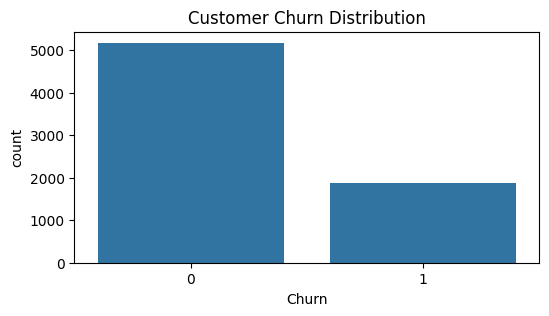

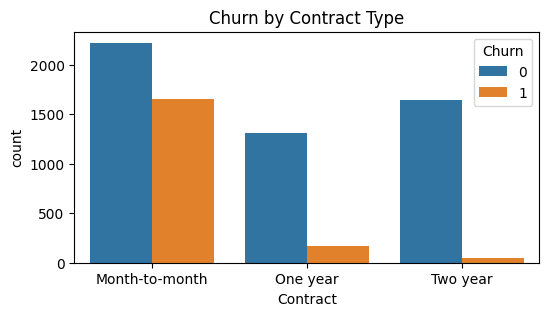

In [264]:
# High-Priority Features for churn - 
# 1. Contract type 

# Churn distribution (Target Variable)
plt.figure(figsize=(6, 3))
sns.countplot(x='Churn', data=df)
plt.title("Customer Churn Distribution")
plt.show()

# Churn by Contract Type (Business Insight)
plt.figure(figsize=(6, 3))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Churn by Contract Type")
plt.show()

# Monthly contract tend to high churn,need to focus on strategies for month-to-month contract

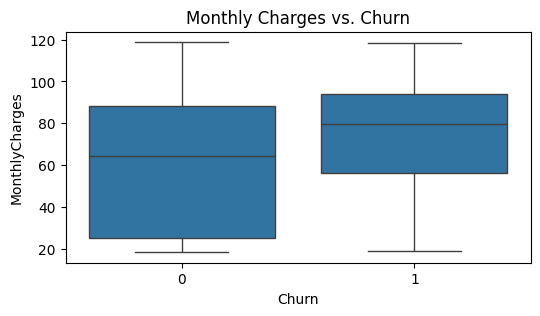

In [265]:
# 2. Monthly Charges
# Monthly Charges vs. Churn (Critical for pricing strategy)
plt.figure(figsize=(6, 3))
sns.boxplot(x='Churn',y='MonthlyCharges',data=df)
plt.title("Monthly Charges vs. Churn")
plt.show()

# Stayed customer's monthly charges median about 65, many people pay less than median. Churned customer's monthly fee median is about 80
# price dissatisfaction might be a churn driver
# Some non-churn customers also pay higher than median,maybe they have Internetservice or other service etc

Churn
0    57.29
1    42.71
Name: proportion, dtype: float64
57.29%


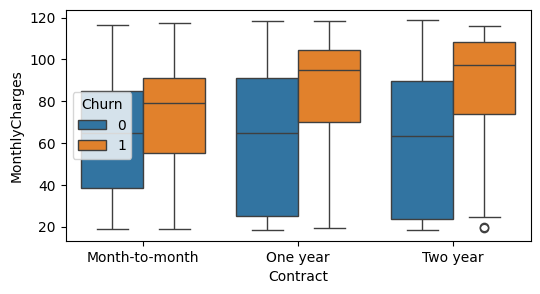

In [266]:
# Monthly Charges and Contract type combination with Churn 
plt.figure(figsize=(6, 3))
sns.boxplot(data=df, x='Contract', y='MonthlyCharges', hue='Churn')
filter_df = df[df['Contract'] == 'Month-to-month']
churn_pct = filter_df['Churn'].value_counts(normalize=True).mul(100).round(2)

print(churn_pct)
Non_churn = f"{churn_pct[0]}%"
print(Non_churn)

# Observations
 >Month-to-month churned pay overal high median ~80 and non-churn pay median 65, less spread in price but some people pay more , some churn customers paid less than median but still churned. (price is not the only issue here, maybe monthy contract feel less committed)

 >one-year-contract churned also pay higher with median ~90,fewer customers pay high maybe other service, majority pay less than median ,overall churn less than month-to-month.

 >two-year-contract non-churn pay median 60, very few churn,stable and loyal, very few are paying very high(maybe other services). Churned customers pay higher with median ~95, some paid less but still churn, might be other reason caused churn(Internetservice, Payment etc)

In [267]:
# calculate churn rates per contract group:
df.groupby(['Contract', 'Churn'])['MonthlyCharges'].describe()

count       mean        std    min      25%     50%  \
Contract       Churn                                                         
Month-to-month 0      2220.0  61.462635  27.863547  18.75  38.5375  64.950   
               1      1655.0  73.019396  24.084146  18.85  55.2000  79.050   
One year       0      1307.0  62.508148  31.659200  18.25  24.8250  64.850   
               1       166.0  85.050904  25.641127  19.30  70.1125  95.050   
Two year       0      1647.0  60.012477  34.547327  18.40  23.7750  63.300   
               1        48.0  86.777083  28.917883  19.35  73.6500  97.275   

                           75%     max  
Contract       Churn                    
Month-to-month 0       84.9125  116.50  
               1       90.8750  117.45  
One year       0       91.2500  118.60  
               1      104.7000  118.35  
Two year       0       89.8500  118.75  
               1      108.4500  116.20

# Obvservations: 
 >Month-to-month churned customer paid slightly higher price, price should not be the most important factor(might be less committed or service, or more competitors)

 >One-year and two-year contract,especially two-year loyal and very few churn.

 > Churned customers for 1year and 2 year contract pay obviously higher fee, Q1 pay 3 times more,Q2 pay 50%+ more,Q3 pay 20%+more ,especially in 2-year customers, one-year and two-year contract customers churn mainly because of the price(What caused the high price ?)


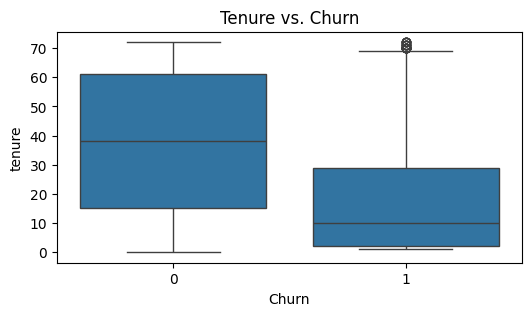

48.28 Churn
0    70.49
1    29.51
Name: count, dtype: float64


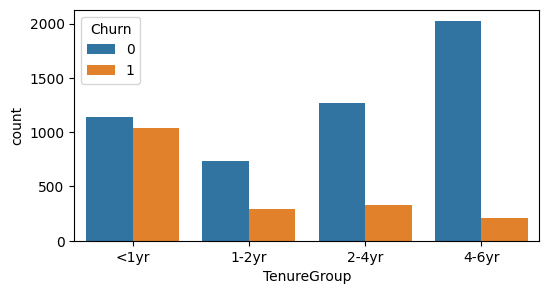

In [268]:
# 3. Tenure
plt.figure(figsize=(6, 3))
sns.boxplot(x='Churn',y='tenure', data=df)
#sns.violinplot(data=df, x='Churn', y='tenure',palette='Set3')
plt.title("Tenure vs. Churn")
plt.show()

# Create tenure segments
df['TenureGroup'] = pd.cut(df['tenure'], bins=[0, 12, 24, 48, 72], labels=['<1yr', '1-2yr', '2-4yr', '4-6yr'])
plt.figure(figsize=(6, 3))
sns.countplot(data=df, x='TenureGroup', hue='Churn')

tenure1_df = df[df['tenure'] < 12]
churn_counts = tenure1_df['Churn'].value_counts()
churn_rate1 = (churn_counts / churn_counts.sum()*100).round(2)

tenure2_df = df[(df['tenure'] >= 12) & (df['tenure'] < 24)]
churn_count2 = tenure2_df['Churn'].value_counts()
churn_rate2 = (churn_count2/churn_count2.sum()*100).round(2)
print(churn_rate1[1],churn_rate2)

# Obervations :
 > Stayed customer has median tenure 38 months, average tenure are 15-60 months. Churned customer has median 10months, very few long-term custmers churn(outliers) 
# Insights:
> Long tenure customers churned might be other reason such as price hikes, service unsatisfied issue, contract expiry etc
> New customers < 1year churning early , need to focus on new customers

In [269]:
# calculate churn rates per tenure group:
df['TenureGroup'] = pd.cut(df['tenure'], bins=[0, 12, 24, 48, 72], labels=['<1yr', '1-2yr', '2-4yr', '4-6yr'])
df.groupby(['TenureGroup', 'Churn'],observed=True)['MonthlyCharges'].describe()



count       mean        std    min      25%     50%  \
TenureGroup Churn                                                         
<1yr        0      1138.0  46.766169  25.056428  18.75  20.3500  45.400   
            1      1037.0  66.493973  24.172894  18.85  48.5500  73.850   
1-2yr       0       730.0  54.449589  28.159697  18.80  20.7625  55.325   
            1       294.0  78.509014  21.124883  19.40  69.3125  84.525   
2-4yr       0      1269.0  61.174783  30.047573  18.25  25.5500  64.200   
            1       325.0  84.500000  20.583005  19.55  75.5000  89.100   
4-6yr       0      2026.0  72.029245  31.789211  18.40  46.5250  80.325   
            1       213.0  92.171127  20.937096  19.35  85.4500  99.900   

                        75%     max  
TenureGroup Churn                    
<1yr        0       69.9000  111.40  
            1       84.7000  112.95  
1-2yr       0       79.6125  112.95  
            1       94.4000  111.20  
2-4yr       0       87.8000  116.25  
            1       99.5500  117.45  
4-6yr       0       99.3250  118.75  
            1      105.5000  118.35

# Total Observations :
 >for <1 yr churned customer, they pay 40% more than non-churn. 
 >for 1-2yrs churned customer, they pay 44% more than non-churn ,especially Q1 churned pay more than 3 times of the price than non-churn
 >for 2-4yrs churned customer, they pay 37% more than non-churn, especially Q1 churned pay 3 times of the price than non-churn
 >for 4-6yrs churned customer, they pay 27% more than non-churn, especially Q1 churned pay almost double of the price than non-churn

# Strategy : 
 >For < 1 yr New customers , might be commitment issue, price issue, service unsatisfied issue etc, Focus on increase their stickness and commmitment, offer discount and provide automatic service as bonus for convenience/stickness 
 >For 1-6yrs churned customers ,focus on why they pay much higher price (Q1)but churn, maybe the extra service they bought are unsatisfied. Offer some renew discount, customized service/support to maintain their satifaction and loyalty 
 

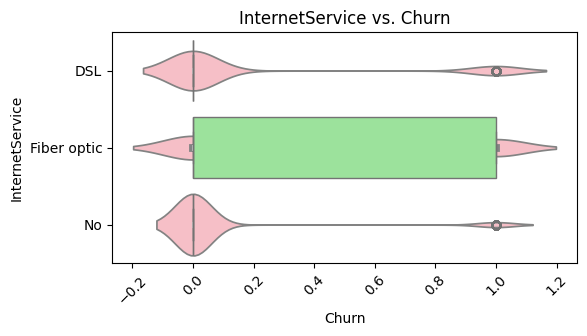

In [270]:
# 4. InternetService with Churn
plt.figure(figsize=(6, 3))
plt.xticks(rotation=45)  # Rotate labels for readability
sns.violinplot(data=df,x='Churn',y='InternetService',color='lightpink')
sns.boxplot(x='Churn',y='InternetService',data=df,color='lightgreen')
plt.title("InternetService vs. Churn")
plt.show()

# Fiber Optic tend to churn, No Internetservice has very low churn, DSL is normal. 
# Need to focus on the reason that Fiber Optic customer's churn ,maybe retention discount and provide better Internetservice


/var/folders/9v/_p3v26m97tz_mmc4tdysn_6h0000gn/T/ipykernel_91907/423460579.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Service_combo',y='Churn',data=combo_churn,palette='viridis')


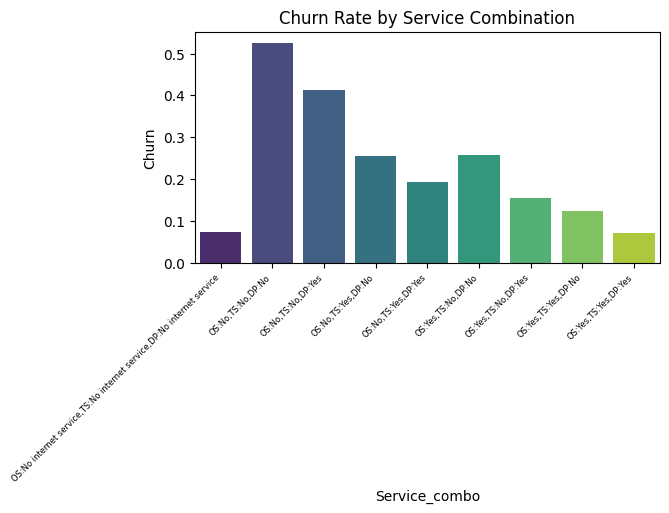

In [271]:
# 5. OnlineSecurity/TechSupport/DeviceProtection

# Create a new column for service combinations
df['Service_combo']=df.apply(lambda x :f"OS:{x['OnlineSecurity']},TS:{x['TechSupport']},DP:{x['DeviceProtection']}",axis=1)
# calculate combo churn 
combo_churn = df.groupby('Service_combo')['Churn'].mean().reset_index()

plt.figure(figsize=(6,3))
sns.barplot(x='Service_combo',y='Churn',data=combo_churn,palette='viridis')
plt.xticks(rotation=45,ha='right',fontsize=6)
plt.title("Churn Rate by Service Combination")
plt.show()


# Observations:
 >Customers without Internet Service has very few churn ~8% , Customrs with InternetService as well as Service_combo has very few churn ~7%

 >Customers with InternetService but lacking all three services has very high-risk to churn ~52%

 >Customer has Device Protection but lacking Online Security and Techsupport also has high churn ~42%

 >Customers has at least two Services in the combo churn rate dropped immediately to (18%, 15%, 12%),which means Internetservice with service combo is not an issue , Service price is an issue, also might need to improve the single service 

# Insights and Strategy  : 
 >Need to focus on InternetService price and Servie_Combo improvement
 >For the customers with InternetService need to add Service Combo (can offer InternetService package) for satisfaction , can also provide discount for service_combo


In [272]:
# Calculate churn rates with and without InternetService rates per MonthlyCharges group and Contract type Group
print(df.groupby(['InternetService', 'Churn'],observed=True)['MonthlyCharges'].describe())

                        count       mean        std    min     25%    50%  \
InternetService Churn                                                       
DSL             0      1962.0  60.212105  16.109146  24.15  49.700  59.75   
                1       459.0  49.083224  13.608829  23.45  42.125  49.25   
Fiber optic     0      1799.0  93.932379  12.653712  68.60  84.400  94.80   
                1      1297.0  88.126484  11.882834  67.75  78.800  87.55   
No              0      1413.0  21.136058   2.201510  18.25  19.700  20.15   
                1       113.0  20.368142   1.456851  18.85  19.650  20.00   

                           75%     max  
InternetService Churn                   
DSL             0       72.100   94.80  
                1       55.675   92.45  
Fiber optic     0      104.400  118.75  
                1       98.400  118.35  
No              0       21.000   26.90  
                1       20.350   25.90  


In [273]:
print(df.groupby(['InternetService', 'Churn'],observed=True)['Contract'].describe())

                      count unique             top  freq
InternetService Churn                                   
DSL             0      1962      3  Month-to-month   829
                1       459      3  Month-to-month   394
Fiber optic     0      1799      3  Month-to-month   966
                1      1297      3  Month-to-month  1162
No              0      1413      3        Two year   633
                1       113      3  Month-to-month    99


In [274]:
print(df.groupby(['InternetService','Churn'],observed=True)['Service_combo'].describe())

                      count unique  \
InternetService Churn                
DSL             0      1962      8   
                1       459      8   
Fiber optic     0      1799      8   
                1      1297      8   
No              0      1413      1   
                1       113      1   

                                                                     top  freq  
InternetService Churn                                                           
DSL             0                                   OS:Yes,TS:Yes,DP:Yes   426  
                1                                      OS:No,TS:No,DP:No   218  
Fiber optic     0                                      OS:No,TS:No,DP:No   467  
                1                                      OS:No,TS:No,DP:No   696  
No              0      OS:No internet service,TS:No internet service,...  1413  
                1      OS:No internet service,TS:No internet service,...   113  


# Observations from line 51,52,53
 >Table 1 :
No InternetService ----very few churned customers .
Fiber Optic ---- pay much higher, almsot 50% churn. 
DSL---- medium price some churned. 
Both InternetService churned customers are paying less than non-churn, so the price is not only the factor to cause churn, most likely the internetService expectation are not met.

 >Table 2 :
Majority of DSL and Fiber Optic custmers are Month-to-month contract.
Month-to-month customers has high risk to churn no matter with or without InternetService
Both table shows two-year customers without Internetservice are stable and loyal.
No InternetService churn less despite the month-to-month contract , so their execpectation for internet has not met. 

> Table 3 and 2 :
Fiber optic churn rate ~ 42%, 54% of churned customers has no service_combo
Non-churn Fiber optic customers also has the most people(467) has no service_combo (Price could be an issue for Fiber Optic)
DSL customers churn rate ~ 20%, almost half churned customers has no service_combo
Most(426/1962)non-churn customers of using DSL has service_combo. 
No Internet and service combo (all two-year contract) has very few churn 7.4%

# Strategy :
 1. keep the loyal two-year customers as it is.  
 2. for Month-to-month no Service_combio customer, Offer 20% discount for InternetService and Servicecombo package to retein them, or offer 50% discount of the package if month-to-month customers upgrade to yearly contract. 
 3. For 1 year customers, offer 20% renew discount service_combo package for stickness to upgrade to two-year contract, or 20% discount upgrade their 1 or 2 service to all 3 services.

 @ Investigate why lower-paying DSL customers leave, maybe one or two services are not as good as expected? Or price is too hight with 3 services ? Why Fiber optic customers are lacking service_combo, too high price ? what's the expectation when customers pay the price ?

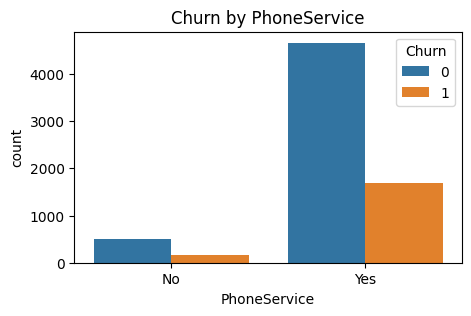

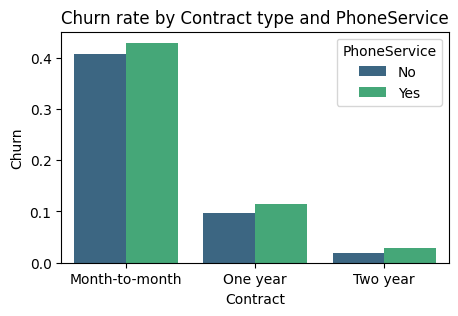

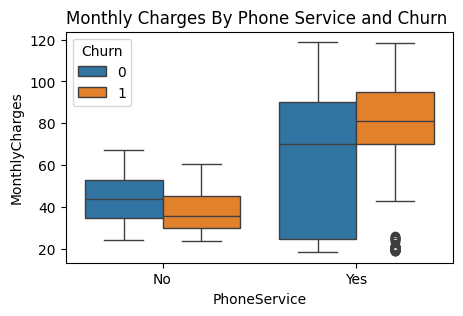

In [275]:
# 6 PhoneService
plt.figure(figsize=(5, 3))
sns.countplot(x='PhoneService', hue='Churn', data=df)
plt.title("Churn by PhoneService")
plt.show()

# PhoneServices with Contract type 
grouped = df.groupby(['PhoneService','Contract'])['Churn'].mean().reset_index()
plt.figure(figsize=(5,3))
sns.barplot(data=grouped,
            x='Contract',
            y='Churn',
            hue='PhoneService',
            palette='viridis'
            )
plt.title('Churn rate by Contract type and PhoneService')
plt.show()

# Compare Churn rate by Monthly charges with PhoneService 
plt.figure(figsize=(5,3))
sns.boxplot(data=df,x='PhoneService',y='MonthlyCharges',hue='Churn')
plt.title('Monthly Charges By Phone Service and Churn ')
plt.show()

# Observations:
> Both One-year and two-year customers has very few churn no matter with or without PhoneService
> Month-to-month 40% churn rate with or without PhoneService, one-year 10% churn
> 3 Types Contracts has churned more with PhoneService, they are paying much more (80) than (35), Non-churn with Phoneserrvice are paying (70) than No-Phonrservice(45)

Insight:
PhoneService is not an big issue,price sensitive might be a reason, TotalCharge (price with Phone or Internet) and contract type caused churn  

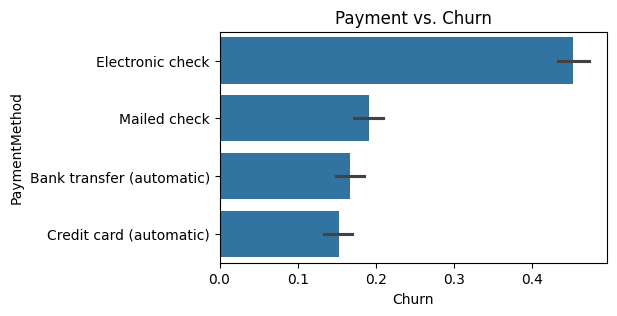

In [276]:
# 7. Payment Method
plt.figure(figsize=(5, 3))
sns.barplot(x='Churn',y='PaymentMethod',data=df)
plt.title("Payment vs. Churn")
plt.show()

# Highest churn-Electronic check, lowest churn credit card(automatic),might because of the convenience ? 
# correlation but not causation - can check history analysis,if churn dropped for customers who switched to automatic payments in the past
# Then Retention Strategy : discount for enrolling in auto-pay or proactively engage Eletronic Check users by reminder, or support 

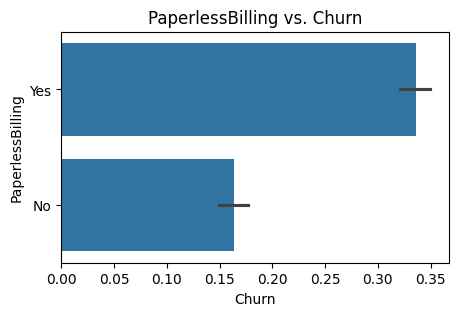

                                count unique             top freq
PaymentMethod             Churn                                  
Bank transfer (automatic) 0      1286      3        Two year  545
                          1       258      3  Month-to-month  201
Credit card (automatic)   0      1290      3        Two year  568
                          1       232      3  Month-to-month  178
Electronic check          0      1294      3  Month-to-month  856
                          1      1071      3  Month-to-month  994
Mailed check              0      1304      3  Month-to-month  611
                          1       308      3  Month-to-month  282


In [277]:
# 7. PaperlessBilling
plt.figure(figsize=(5, 3))
sns.barplot(x='Churn',y='PaperlessBilling',data=df)
plt.title("PaperlessBilling vs. Churn")
plt.show()

# Calculate churn rates with paymentmethod per Contract type Group
print(df.groupby(['PaymentMethod', 'Churn'],observed=True)['Contract'].describe())

                       count unique             top  freq
PaperlessBilling Churn                                   
No               0      2403      3        Two year   895
                 1       469      3  Month-to-month   406
Yes              0      2771      3  Month-to-month  1337
                 1      1400      3  Month-to-month  1249


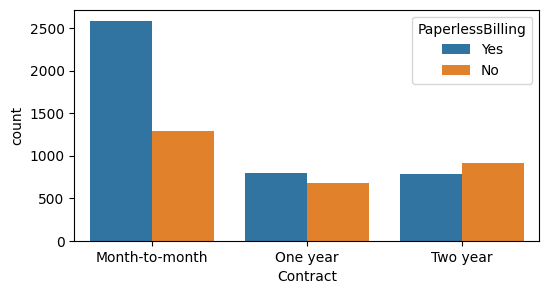

In [278]:
# Compare contract types for PaperlessBilling vs. Non-PaperlessBilling
plt.figure(figsize=(6, 3))
sns.countplot(x='Contract', hue='PaperlessBilling', data=df)

## Calculate churn rates with paperlessBilling per Contract type Group
print(df.groupby(['PaperlessBilling', 'Churn'],observed=True)['Contract'].describe())

# Observations from line 58 and line 59:
> Table 1 shows that Automatic Pay(Bank ransfer and credit card) has ver few churn ,also they are all two-year contract custmers, the automatic payment churned customers are all month-to-month contract, and also all non automatic payment are all month-to-month customers .
> Table 2 and plot2 show that PaperlessBilling mostly in month-to-month customers, Non-churned are all non-paperlessbill and two-year contract, some non-paperlessbilling churned are all month-to-month customer. 1/3 month-to-month churn with paperlessbilling


- !!! Month-to-month Customers has highest risks to churn(they tend to pay higher price by using InternetService without full service support, less committed, short tenure, they also tend to receive paperlessbill and non-automatic payment,which is convenient to check and cancle anytime)

# Strategy :
 - Keep the two-year customer as it is 
 - Offer incentives for one-year customers with non-PaperlessBilling(inconvenience) and auto-pay(convenience), add multiple payment reminder 
 - offer discount or additional InternetService package for month-to-month customers to upgrade to yearly contract, offer incentives for auto-pay and stay (for convenience), add multiple payment reminder  

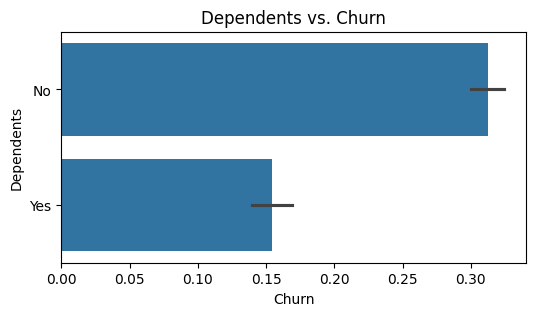

,Dependents,Churn
0,No,0.312791
1,Yes,0.154502


In [279]:
# 6. Dependents/Partner vs churn (Decision Maker)
plt.figure(figsize=(6, 3))
sns.barplot(x='Churn',y='Dependents',data=df)
plt.title("Dependents vs. Churn")
plt.show()

churn_rate = df.groupby('Dependents')['Churn'].mean().reset_index()
churn_rate
# Independents churn twice as high as Dependents (might be the reason that the parent/caregiver is doing payment)

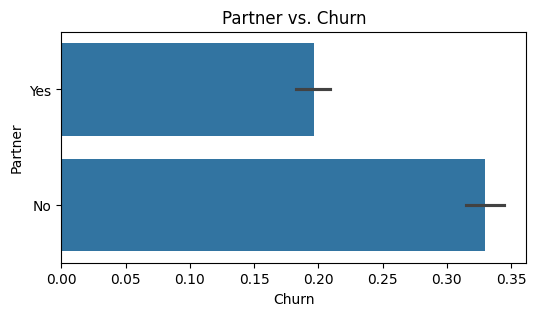

In [280]:
plt.figure(figsize=(6, 3))
sns.barplot(x='Churn',y='Partner',data=df)
plt.title("Partner vs. Churn")
plt.show()

# Singles churn 65% higher than people has partners 

Churn                      0         1
Partner Dependents                    
No      No          0.657622  0.342378
        Yes         0.786704  0.213296
Yes     No          0.745917  0.254083
        Yes         0.857633  0.142367


<Figure size 500x300 with 0 Axes>

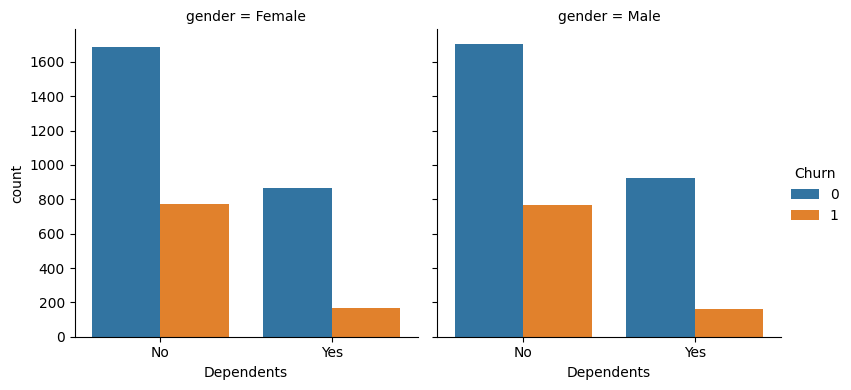

In [281]:
# Combine customers has partner + has dependent 
# Combine customers has partner + no dependent 
# Combine customers no partner + has dependent 
# Combine customers no partner + no dependent 
print(pd.crosstab(index=[df['Partner'], df['Dependents']], columns=df['Churn'], normalize='index'))

# dependent with gender 
plt.figure(figsize=(5, 3))
sns.catplot(data=df, kind='count', x='Dependents', hue='Churn', col='gender', height=4, aspect=1)

 # Observations:
 > From the plot -- Depedents churn less , Independents churn double than Dependents, with both genders 
 > From the table -- Single independent customers has a 34% to churn, dependent with Partner churn less around 14% 
 > can combine gender and contract type with dependent 

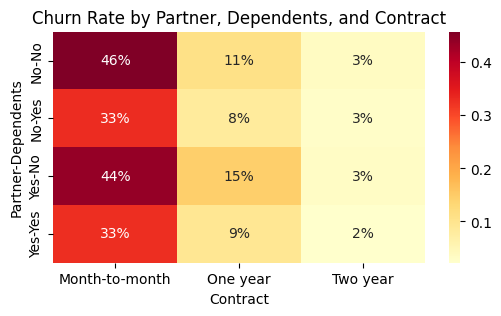

In [282]:
# Pivot table for heatmap(combine with contract type)
heatmap_data = df.pivot_table(
    index=['Partner', 'Dependents'], 
    columns='Contract', 
    values='Churn', 
    aggfunc='mean'
)

# Plot
plt.figure(figsize=(6, 3))
sns.heatmap(heatmap_data, annot=True, fmt=".0%", cmap="YlOrRd")
plt.title("Churn Rate by Partner, Dependents, and Contract")
plt.show()

# Observation: 
 >Independent Month-to-month plan churn with a high risk of 46% and 44% , Dependents with Month-to-month plan has 33% churn rate, both has much less churn with one-year and two-year contract
# Strategy - 
> give discount and personalized(customized)service and support to Single Independent Month-to-month customers 

B ---- FEATURE ENGINEERING 

In [283]:
print(df.shape)
df.head(5)

(7043, 23)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup,Service_combo
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,<1yr,"OS:No,TS:No,DP:No"
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,0,2-4yr,"OS:Yes,TS:No,DP:Yes"
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,<1yr,"OS:Yes,TS:No,DP:No"
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,2-4yr,"OS:Yes,TS:Yes,DP:Yes"
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,<1yr,"OS:No,TS:No,DP:No"


In [284]:
df.dtypes

customerID            object
gender                object
SeniorCitizen          int64
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges          object
Churn                  int64
TenureGroup         category
Service_combo         object
dtype: object

In [285]:
# Convert Object[TotalCharges] to Numerical values 
from sklearn.impute import SimpleImputer
import sklearn
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df = df.drop(['customerID'],axis=1)

imputer = SimpleImputer(strategy='mean')
imputer.fit(df[['TotalCharges']])

print(df["TotalCharges"].isnull().sum())
df['TotalCharges'] = imputer.transform(df[['TotalCharges']])

11


In [286]:
df['TotalCharges'].isnull().sum()

np.int64(0)

In [287]:

target_col = 'Churn'
input_cols = list(df.drop(['Churn','TenureGroup','SeniorCitizen'],axis=1))

X = df.drop(columns=['Churn'])
y = df['Churn']


In [288]:
# train , validation and test split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)

(5634, 21)
(1409, 21)


In [289]:
imputer = SimpleImputer(strategy='most_frequent')  # or 'mean' for numeric
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test) 

In [290]:
train_inputs = X_train[input_cols]
train_target = y_train

test_inputs = X_test[input_cols]
test_target = y_test

In [291]:
numerical_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()
print(numerical_cols)
print(categorical_cols)

['tenure', 'MonthlyCharges', 'TotalCharges']
['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Service_combo']


In [305]:
# checking missing numeric values
X_train[numerical_cols].isna().sum()

tenure            0
MonthlyCharges    0
TotalCharges      0
dtype: int64

In [293]:
# Scaling Numerical Features by MinMaxScaler for Logistic Regression

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(df[numerical_cols])

X_scaled_numeric_df = scaler.transform(df[numerical_cols])

In [294]:
X_scaled_numeric_df

array([[0.01388889, 0.11542289, 0.0012751 ],
       [0.47222222, 0.38507463, 0.21586661],
       [0.02777778, 0.35422886, 0.01031041],
       ...,
       [0.15277778, 0.11293532, 0.03780868],
       [0.05555556, 0.55870647, 0.03321025],
       [0.91666667, 0.86965174, 0.78764136]], shape=(7043, 3))

In [295]:
train_inputs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5634 entries, 2142 to 860
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5634 non-null   object 
 1   Partner           5634 non-null   object 
 2   Dependents        5634 non-null   object 
 3   tenure            5634 non-null   int64  
 4   PhoneService      5634 non-null   object 
 5   MultipleLines     5634 non-null   object 
 6   InternetService   5634 non-null   object 
 7   OnlineSecurity    5634 non-null   object 
 8   OnlineBackup      5634 non-null   object 
 9   DeviceProtection  5634 non-null   object 
 10  TechSupport       5634 non-null   object 
 11  StreamingTV       5634 non-null   object 
 12  StreamingMovies   5634 non-null   object 
 13  Contract          5634 non-null   object 
 14  PaperlessBilling  5634 non-null   object 
 15  PaymentMethod     5634 non-null   object 
 16  MonthlyCharges    5634 non-null   float64
 17

In [296]:
train_inputs.head()

,gender,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Service_combo
2142,Female,No,Yes,21,Yes,No,DSL,Yes,No,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.800000,"OS:Yes,TS:No,DP:Yes"
1623,Female,No,No,54,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.450000,"OS:No,TS:No,DP:No"
6074,Male,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.450000,"OS:No,TS:No,DP:No"
1362,Male,No,No,4,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.950000,"OS:No,TS:No,DP:No"
6754,Male,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,2283.300441,"OS:Yes,TS:Yes,DP:No"


In [297]:
# Encode categorical data 
from sklearn.preprocessing import OneHotEncoder

df[categorical_cols].head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Service_combo
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,"OS:No,TS:No,DP:No"
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,"OS:Yes,TS:No,DP:Yes"
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,"OS:Yes,TS:No,DP:No"
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),"OS:Yes,TS:Yes,DP:Yes"
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,"OS:No,TS:No,DP:No"


In [298]:

encoder = OneHotEncoder(sparse_output=False,handle_unknown='ignore')
encoder.fit(df[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'Payment

In [299]:
train_inputs.loc[:,encoded_cols] = encoder.transform(train_inputs[categorical_cols])
test_inputs.loc[:,encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [300]:
# Creat Encoded categorical cols for Scaled_inputs 

X_categorical_df = df[categorical_cols]

X_cat_encoded = encoder.transform(X_categorical_df)
X_cat_encoded_df = pd.DataFrame(X_cat_encoded, columns=encoder.get_feature_names_out(categorical_cols))

X_cat_encoded_df.head(5)

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,PaymentMethod_Mailed check,"Service_combo_OS:No internet service,TS:No internet service,DP:No internet service","Service_combo_OS:No,TS:No,DP:No","Service_combo_OS:No,TS:No,DP:Yes","Service_combo_OS:No,TS:Yes,DP:No","Service_combo_OS:No,TS:Yes,DP:Yes","Service_combo_OS:Yes,TS:No,DP:No","Service_combo_OS:Yes,TS:No,DP:Yes","Service_combo_OS:Yes,TS:Yes,DP:No","Service_combo_OS:Yes,TS:Yes,DP:Yes"
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [301]:
# Cancat the scaled numerical cols with encoded categorical cols into a dataframe 

X_scaled_numerical_df = pd.DataFrame(
    X_scaled_numeric_df,
    columns=numerical_cols,
    index=df.index
)

X_scaled_df = pd.concat([X_scaled_numerical_df,X_cat_encoded_df],axis=1)


In [302]:
# Seperate Scaled_inputs for Logistic Regression 

X_scaled_train_inputs, X_scaled_test_inputs = train_test_split(X_scaled_df,test_size=0.2,random_state=42)

print(X_scaled_train_inputs.shape)
print(X_scaled_test_inputs.shape)

(5634, 53)
(1409, 53)


In [303]:
train_inputs = train_inputs[numerical_cols + encoded_cols]
test_inputs = test_inputs[numerical_cols+encoded_cols]

In [ ]:
smote = SMOTE(random_state=42,sampling_strategy='auto')
X_train_res, y_train_res = smote.fit_resample(train_inputs,y_train)
X_scaled_train_res,y_train_res = smote.fit_resample(X_scaled_train_inputs,y_train)

print("Before SMOTE:",y_train.value_counts())
print("After SMOTE:",y_train_res.value_counts())

Before SMOTE: Churn
0    4138
1    1496
Name: count, dtype: int64
After SMOTE: Churn
0    4138
1    4138
Name: count, dtype: int64
tenure    MonthlyCharges  TotalCharges  gender_Female  gender_Male  Partner_No  Partner_Yes  Dependents_No  Dependents_Yes  PhoneService_No  PhoneService_Yes  MultipleLines_No  MultipleLines_No phone service  MultipleLines_Yes  InternetService_DSL  InternetService_Fiber optic  InternetService_No  OnlineSecurity_No  OnlineSecurity_No internet service  OnlineSecurity_Yes  OnlineBackup_No  OnlineBackup_No internet service  OnlineBackup_Yes  DeviceProtection_No  DeviceProtection_No internet service  DeviceProtection_Yes  TechSupport_No  TechSupport_No internet service  TechSupport_Yes  StreamingTV_No  StreamingTV_No internet service  StreamingTV_Yes  StreamingMovies_No  StreamingMovies_No internet service  StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  Contract_Two year  PaperlessBilling_No  PaperlessBilling_Yes  PaymentMethod_Bank transfer (a

Training a Logistic Regression Model by X_scaled data

In [310]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report


model_lr = LogisticRegression(solver='liblinear')
model_lr.fit(X_scaled_train_res,y_train_res)

# Train predictions and probabilty
train_preds = model_lr.predict(X_scaled_train_res)
print(train_preds)

lr_probs = model_lr.predict_proba(X_scaled_train_res)
print('\n')
print(lr_probs)

# Accuracy, compare target with predctions
print('\n')
print(accuracy_score(y_train_res,train_preds))

confusion_matrix(y_train_res,train_preds,normalize='true')

[0 0 1 ... 1 0 1]


[[0.82471475 0.17528525]
 [0.75696683 0.24303317]
 [0.13049858 0.86950142]
 ...
 [0.1587778  0.8412222 ]
 [0.89706686 0.10293314]
 [0.1846228  0.8153772 ]]


0.7746495891735138


array([[0.73368777, 0.26631223],
       [0.18438859, 0.81561141]])

In [311]:
def predict_and_plot(inputs,target, name=''):
    preds=model_lr.predict(inputs)
    
    accuracy = accuracy_score(target,preds)
    print("Accuracy:{:.2f}%".format(accuracy*100))
    
    cf = confusion_matrix(target,preds,normalize='true')
    plt.figure(figsize=(6,3))
    sns.heatmap(cf,annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name))
    
    return preds

Accuracy:77.46%
Accuracy:75.94%


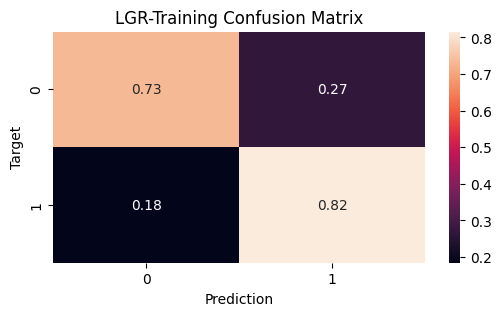

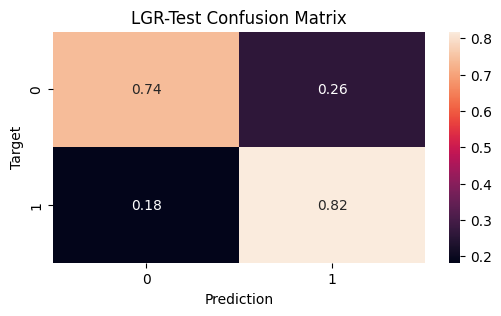

In [312]:
# Compare accuracy with train, validation and test data 
train_preds=predict_and_plot(X_scaled_train_res,y_train_res,'LGR-Training')
test_preds = predict_and_plot(X_scaled_test_inputs,test_target,'LGR-Test')

In [48]:
# Compare the LogisticRegression model's accuracy with a random pr dumb model 

def random_guess(inputs):
    return np.random.choice([0,1],len(inputs))

def all_no(inputs):
    return np.full(len(inputs),0)

print(accuracy_score(test_target,random_guess(X_scaled_test_inputs)))
print(accuracy_score(test_target,all_no(X_scaled_test_inputs)))


# The random model has an accuracy around 50%, all-no model has an accuracy of 73%
# our LogisticRegresson model has an accuracy of 80%

0.47196593328601844
0.7352732434350603


Training a RandamForest Tree Model to compare accuracy  

In [314]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier

model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train_res,y_train_res)

dt_preds = model_dt.predict(X_train_res)
print(dt_preds)

dt_probs = model_dt.predict_proba(X_train_res)
print(dt_probs)

# Check the Accuracy of train dataset ~ 100%
print(accuracy_score(y_train_res,dt_preds))

# Check Accuracy with validation dataset ~ 73%
print(model_dt.score(test_inputs,test_target))

### The DecisionTree Model is overfitting

[0 0 1 ... 1 1 1]
[[1. 0.]
 [1. 0.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]
0.9985500241662639
0.723207948899929


[Text(0.5, 0.875, 'Contract_Month-to-month <= 0.0\ngini = 0.5\nsamples = 8276\nvalue = [4138, 4138]'),
 Text(0.25, 0.625, 'MonthlyCharges <= 93.675\ngini = 0.216\nsamples = 2703\nvalue = [2370, 333]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Service_combo_OS:No,TS:No,DP:No <= 0.015\ngini = 0.103\nsamples = 1956\nvalue = [1850, 106]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Contract_Two year <= 1.0\ngini = 0.423\nsamples = 747\nvalue = [520, 227]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'OnlineSecurity_No <= 0.001\ngini = 0.433\nsamples = 5573\nvalue = [1768.0, 3805.0]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'Contract_Month-to-month <= 0.972\ngini = 0.463\nsamples = 1170\nvalue = [744, 426]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'PaymentMethod_Electronic check <= 0.0\ngini = 0.357\nsa

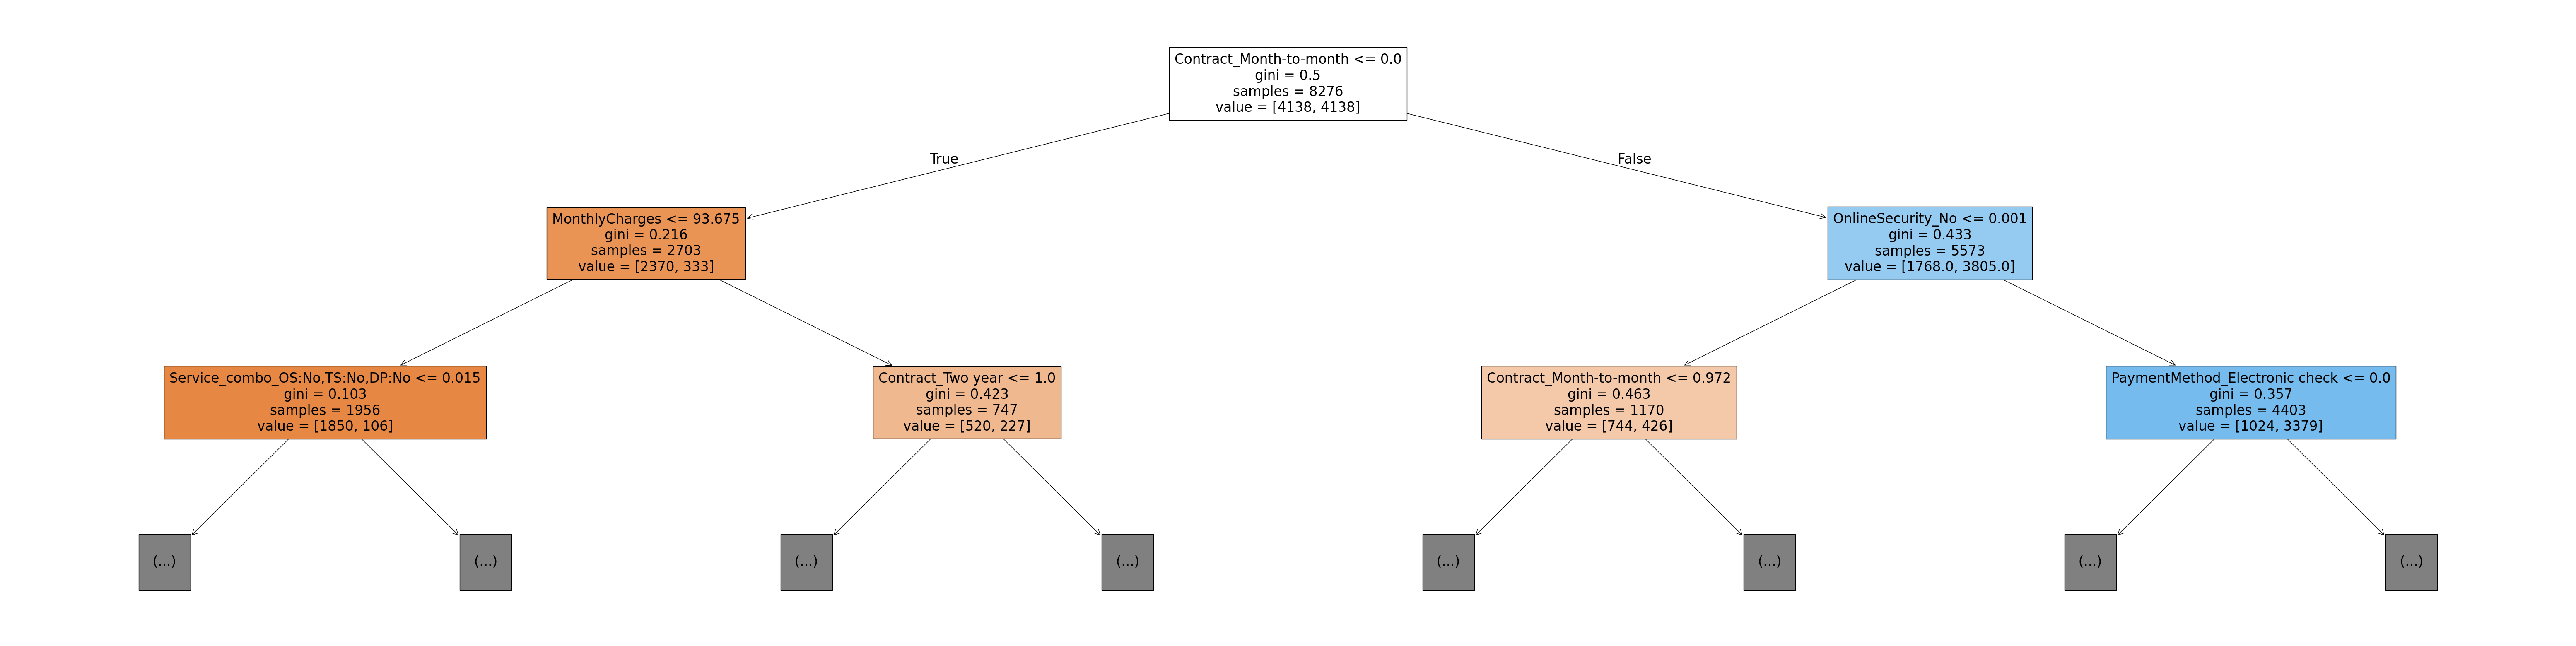

In [315]:
plt.figure(figsize=(80,20))
plot_tree(model_dt, feature_names=X_train_res.columns,max_depth=2,filled=True)

In [316]:
tree_text = export_text(model_dt, max_depth=10, feature_names=list(X_train_res.columns))
print(tree_text[:8000])

|--- Contract_Month-to-month <= 0.00
|   |--- MonthlyCharges <= 93.67
|   |   |--- Service_combo_OS:No,TS:No,DP:No <= 0.02
|   |   |   |--- Contract_One year <= 0.02
|   |   |   |   |--- Service_combo_OS:No,TS:No,DP:Yes <= 0.06
|   |   |   |   |   |--- Service_combo_OS:Yes,TS:Yes,DP:No <= 0.50
|   |   |   |   |   |   |--- OnlineBackup_Yes <= 0.50
|   |   |   |   |   |   |   |--- TotalCharges <= 4747.48
|   |   |   |   |   |   |   |   |--- Service_combo_OS:No,TS:Yes,DP:Yes <= 0.50
|   |   |   |   |   |   |   |   |   |--- TotalCharges <= 1327.75
|   |   |   |   |   |   |   |   |   |   |--- TotalCharges <= 1326.75
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 7
|   |   |   |   |   |   |   |   |   |   |--- TotalCharges >  1326.75
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- TotalCharges >  1327.75
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- Service_combo_OS:No,T

In [317]:
importance_df = pd.DataFrame({
    'feature':X_train_res.columns,
    'importance':model_dt.feature_importances_
}).sort_values('importance',ascending=False)

importance_df.head(10)

,feature,importance
35,Contract_Month-to-month,0.293752
2,TotalCharges,0.139055
1,MonthlyCharges,0.121863
17,OnlineSecurity_No,0.087107
0,tenure,0.071448
42,PaymentMethod_Electronic check,0.066473
37,Contract_Two year,0.019658
39,PaperlessBilling_Yes,0.019389
28,TechSupport_Yes,0.013548
45,"Service_combo_OS:No,TS:No,DP:No",0.012492


Key Insights from the Tree
> Customers likely to churn :
1. Month-to-month + low monthly charges <= $ 59.02 + No dependents ---- High risk of churn (means they have no onlinesecurity)
2. Month-to-month + Bank transfer payment + Tenure > 7.5 month ---- churn risk (they are new customers might have revaluat the charge, service and convenience, has competitors )
> Customers likely to stay :
1. Month-to-month + Has dependents ---- less likely to churn 
2. Month-to-month + Total charges (>147.5) ---- likely to stay
3. Bank Tranfer payment + Very low mothly fee (<=$20.12) ---- stays

> Churn Risk Features:
1. Contract type (Month-to-month = high churn)
2. Monthly Charges (Very low or high = more churn)
3. Paymant Method (Bank Transfer = more stable,Electronic checks = risky)
4. Dependents (with depedents = less churn)
5. Tenure (New customers <= 7.5month = more churn)

Actionable Business Recommendations 
1. Target "Low-commitment Newbies" with() :
Free or 50% discount for online security trails,increase satiisfaction and stickness,discounts for adding dependents or banktransfer
2. Convert "Mid-Tenure Risks" to auto-play(Tenure <= 1 year, and eletronic checks):
Offer discount 5% for bank transfer 
3. Lock in "High-Spending" Casuals (Month-to-month contract with high charges):
Propose annual contract with 10-20% discounts
4. Lock in "Price-Sensitive" Casuals (Month-to-month contract without Onlinesecurity charges):
Propose annual contract with 50% discount onlinesecurity package 


In [320]:
# Hyperparameter Tuning and Overfitting ---- max_depth
# create a helper function to try different depth  
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md,random_state=42)
    model.fit(X_train_res,y_train_res)
    train_accuracy = 1 - model.score(X_train_res,y_train_res)
    test_accuracy = 1- model.score(test_inputs,test_target)
    return {'Max Depth': md,'Training error':train_accuracy,'Validation error':test_accuracy}

In [321]:
error_df = pd.DataFrame([max_depth_error(md) for md in range(1,21)])
error_df

,Max Depth,Training error,Validation error
0,1,0.253867,0.344216
1,2,0.215442,0.259759
2,3,0.210126,0.259759
3,4,0.196351,0.267566
4,5,0.178347,0.219304
5,6,0.162035,0.222143
6,7,0.152489,0.220724
7,8,0.138594,0.227111
8,9,0.124698,0.235628
9,10,0.112736,0.239886


0.7335669405509908
0.8034066713981547


/var/folders/9v/_p3v26m97tz_mmc4tdysn_6h0000gn/T/ipykernel_91907/2820107518.py:8: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend('Training','Test')


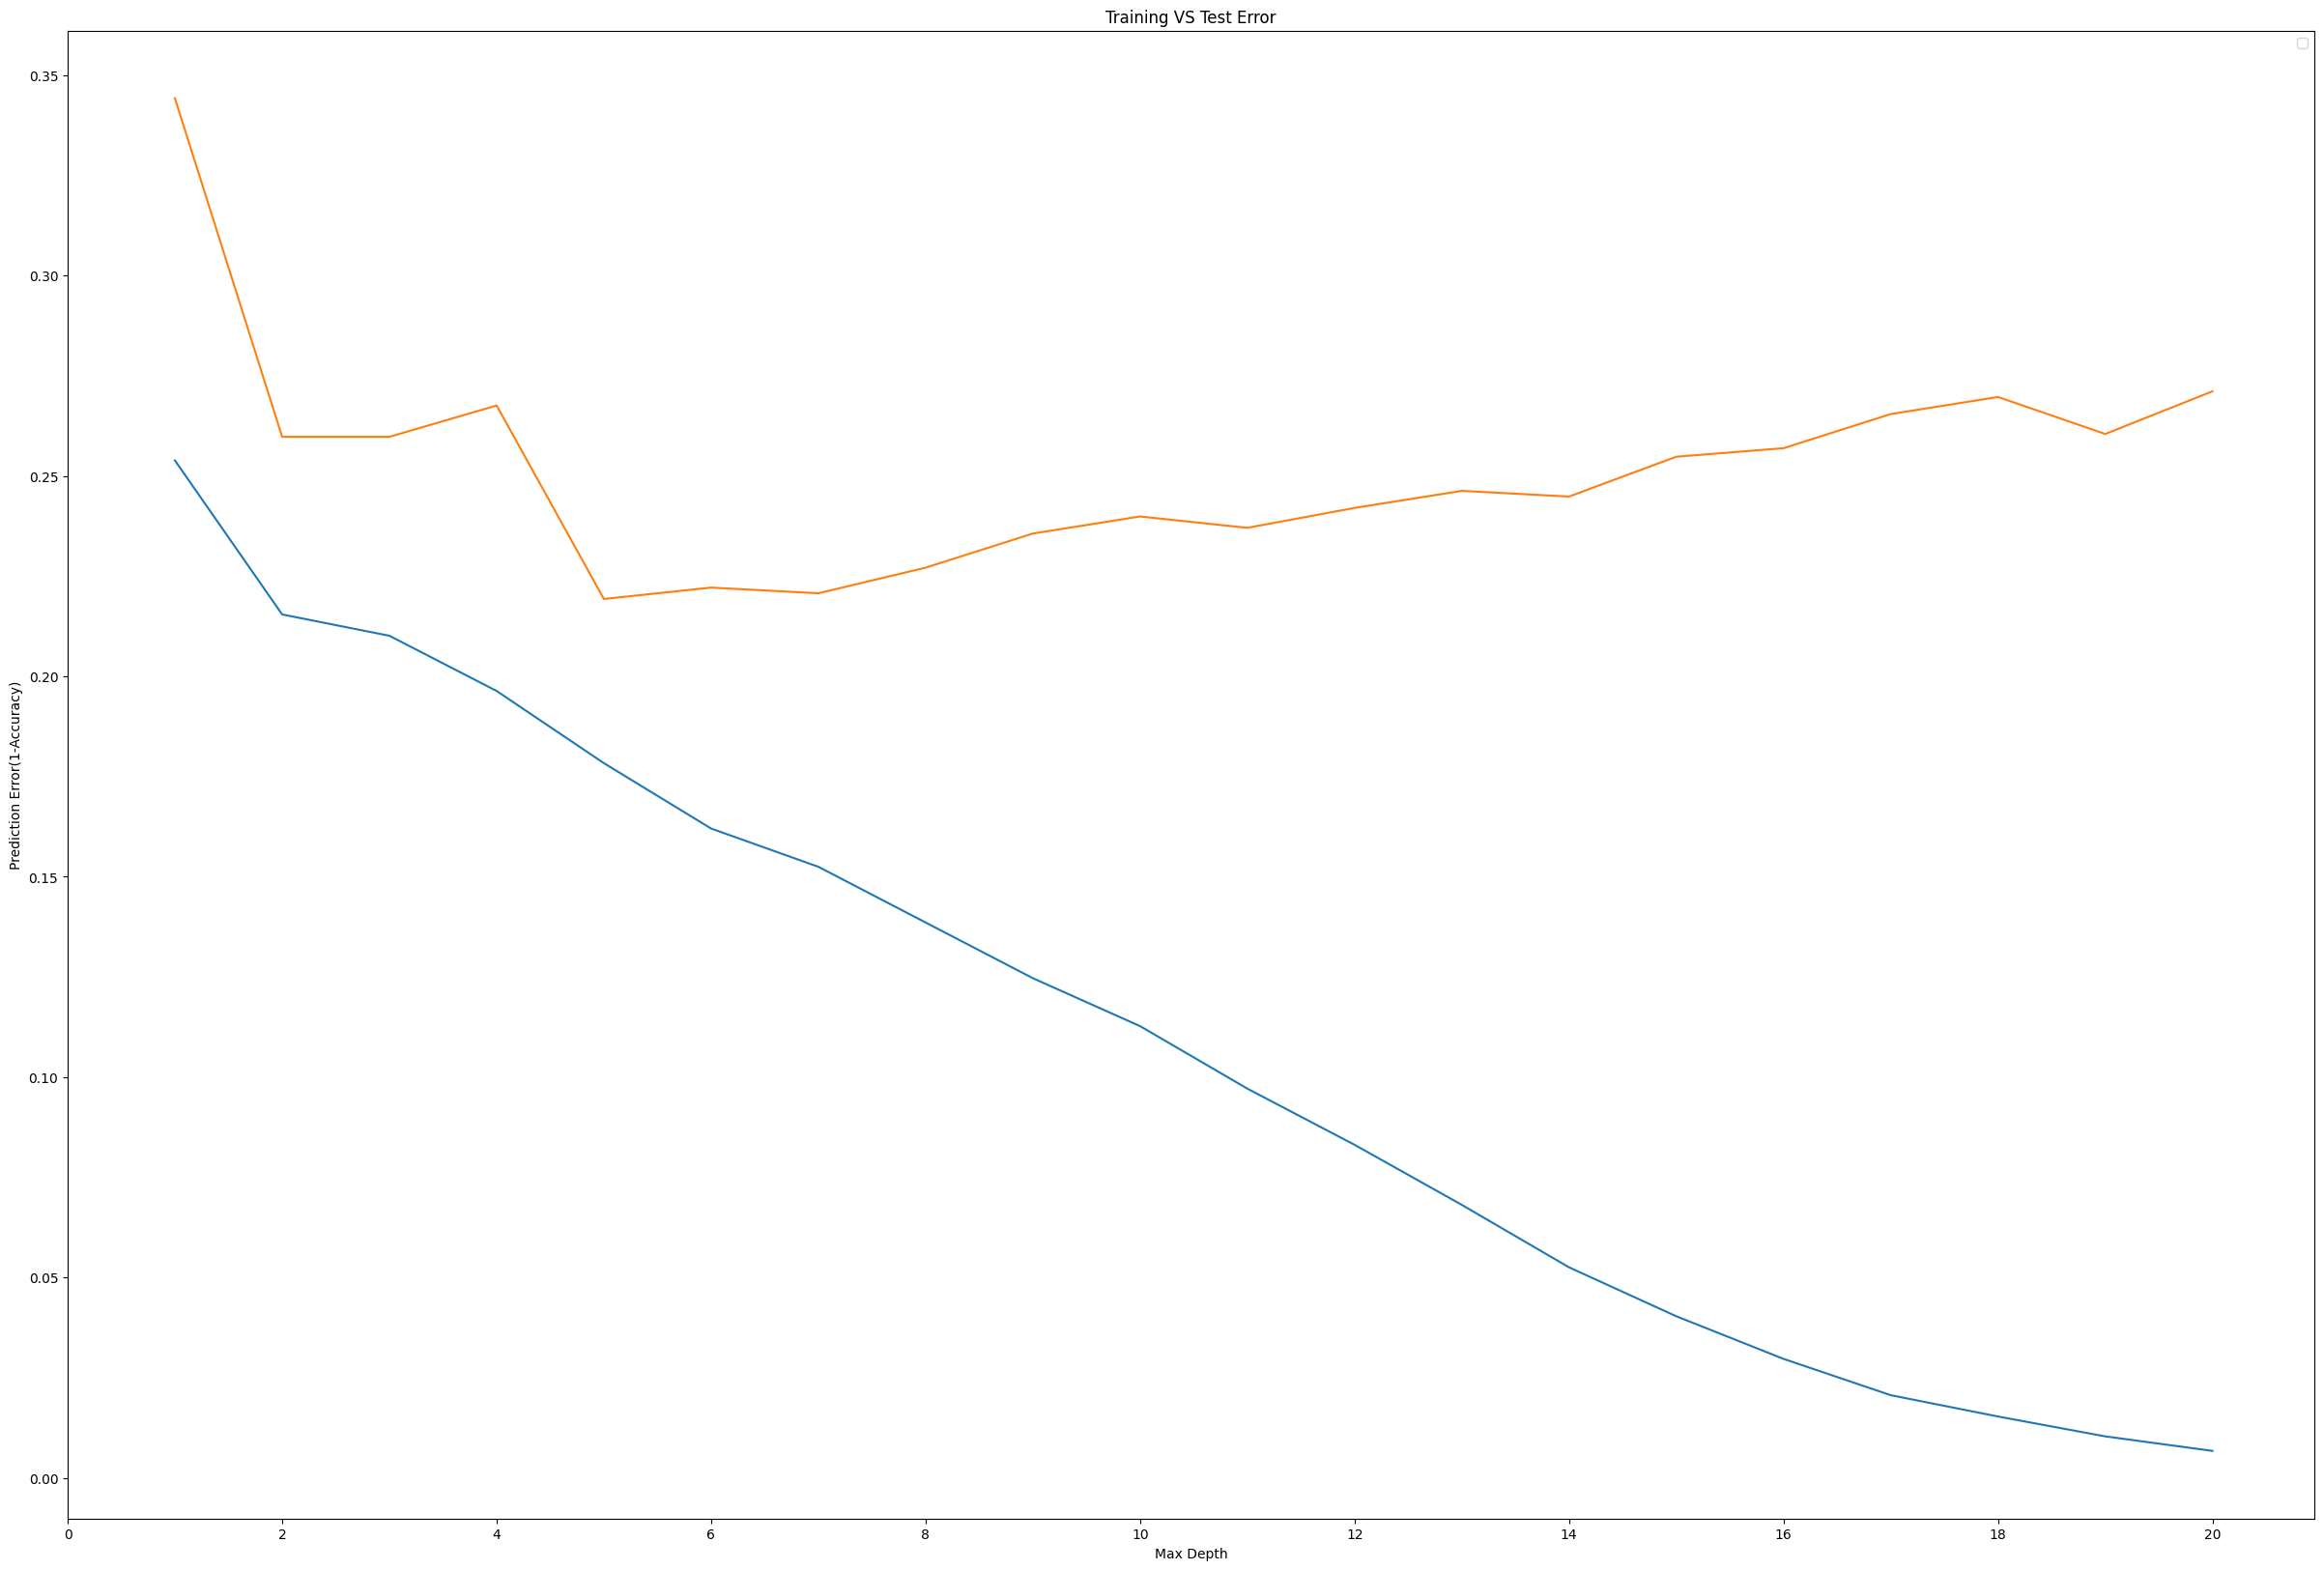

In [322]:
plt.figure()
plt.plot(error_df['Max Depth'],error_df['Training error'])
plt.plot(error_df['Max Depth'],error_df['Validation error'])
plt.title('Training VS Test Error')
plt.xticks(range(0,21,2))
plt.xlabel('Max Depth')
plt.ylabel('Prediction Error(1-Accuracy)')
plt.legend('Training','Test')


# From the plot, max_depth = 7 has the best accuracy for both train and val datasets
model = DecisionTreeClassifier(max_depth=7,random_state=42).fit(train_inputs,train_target)
print(model.score(X_train_res,y_train_res))
print(model.score(test_inputs,test_target))

In [323]:
### Hyperparameter Tuning and Overfitting ---- max_leaf_nodes
model = DecisionTreeClassifier(max_leaf_nodes=115,random_state=42).fit(train_inputs,train_target)
print(model.score(X_train_res,y_train_res))
print(model.score(test_inputs,test_target))

0.7439584340260995
0.7849538679914834


In [324]:
# DecisionTree Model after tuning hyperparameters
model = DecisionTreeClassifier(max_depth=7,max_leaf_nodes=128,random_state=42).fit(train_inputs,train_target)
print(model.score(X_train_res,y_train_res))
print(model.score(test_inputs,test_target))

0.7336877718704689
0.8034066713981547


In [325]:
# Training a Random Forest Model with different n_estimators 

model_rf = RandomForestClassifier(n_jobs=-1,random_state=42,n_estimators=500)
model_rf.fit(X_train_res,y_train_res)

print(model_rf.score(X_train_res,y_train_res))
print(model_rf.score(test_inputs,test_target))

# Model also has overfitting problem
rf_probs = model.predict_proba(train_inputs)
rf_probs

0.9985500241662639
0.7892122072391767


array([[1.        , 0.        ],
       [0.83333333, 0.16666667],
       [0.39102564, 0.60897436],
       ...,
       [0.86486486, 0.13513514],
       [0.16363636, 0.83636364],
       [0.9800995 , 0.0199005 ]], shape=(5634, 2))

                            feature  importance
2                      TotalCharges    0.101921
0                            tenure    0.088225
1                    MonthlyCharges    0.083500
35          Contract_Month-to-month    0.079431
42   PaymentMethod_Electronic check    0.060739
17                OnlineSecurity_No    0.052282
26                   TechSupport_No    0.051343
45  Service_combo_OS:No,TS:No,DP:No    0.036172
20                  OnlineBackup_No    0.030991
37                Contract_Two year    0.023613


<Axes: title={'center': 'Feature Importance'}, xlabel='importance', ylabel='feature'>

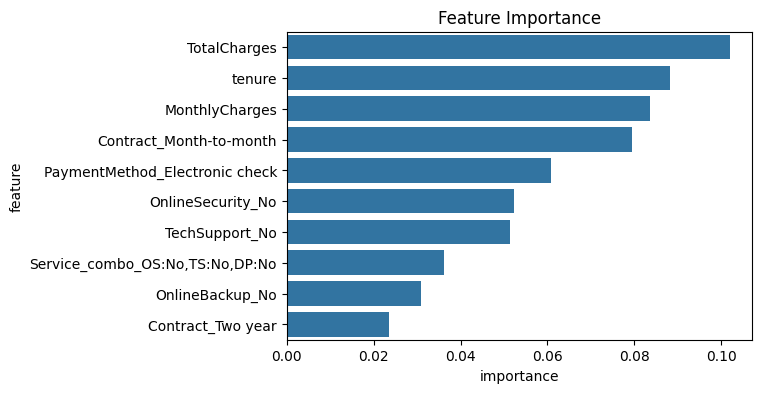

In [326]:
importance_rf = pd.DataFrame({
    'feature':train_inputs.columns,
    'importance':model_rf.feature_importances_
}).sort_values('importance',ascending=False)

print(importance_rf.head(10))

plt.figure(figsize=(6,4))
plt.title('Feature Importance')
sns.barplot(data=importance_rf.head(10),x='importance',y='feature')

In [327]:
# Define a helper function for max depth, max_leaf_nodes, and other hyperparameters

def test_params(**params):
    model_rf = RandomForestClassifier(random_state=42, n_jobs=-1, **params).fit(X_train_res,y_train_res)
    return model_rf.score(X_train_res,y_train_res), model_rf.score(test_inputs, test_target)


# Best max_depth value 
print(test_params(max_depth=7))

# Best max_leaf_node value
print(test_params(max_leaf_nodes=2**7)) 

# Best min_sample_split and leaf value 
print(test_params(min_samples_split=20,min_samples_leaf=10))

# Best min_impurity_decrease value
print(test_params(min_impurity_decrease=1e-4))

(0.8564523924601256, 0.7856635911994322)
(0.8819478008699855, 0.8005677785663591)
(0.8801353310778154, 0.8048261178140526)
(0.916384726921218, 0.7991483321504613)


In [328]:
# RandomForest Model with customized hyperparameters together 
model_rf = RandomForestClassifier(n_jobs=-1, 
                               random_state=42, 
                               n_estimators=500,
                               max_features=10,
                               max_depth=7,
                               min_impurity_decrease=1e-4).fit(X_train_res,y_train_res)

print(model_rf.score(X_train_res,y_train_res),model.score(test_inputs,test_target),model.score(test_inputs,test_target))

rf_pred = model.predict(test_inputs)
print(confusion_matrix(test_target,rf_pred))
print(classification_report(test_target,rf_pred))


0.8589898501691638 0.8034066713981547 0.8034066713981547
[[938  98]
 [179 194]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.66      0.52      0.58       373

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.80      1409



In [329]:
# XGboost Model to predcit churn 
from xgboost import XGBClassifier
from sklearn.metrics import root_mean_squared_error

model_xg = XGBClassifier(random_state=42,n_jobs=-1,n_estimators=20,max_depth=5).fit(X_train_res,y_train_res)
xg_preds = model.predict(X_train_res)


<Axes: >

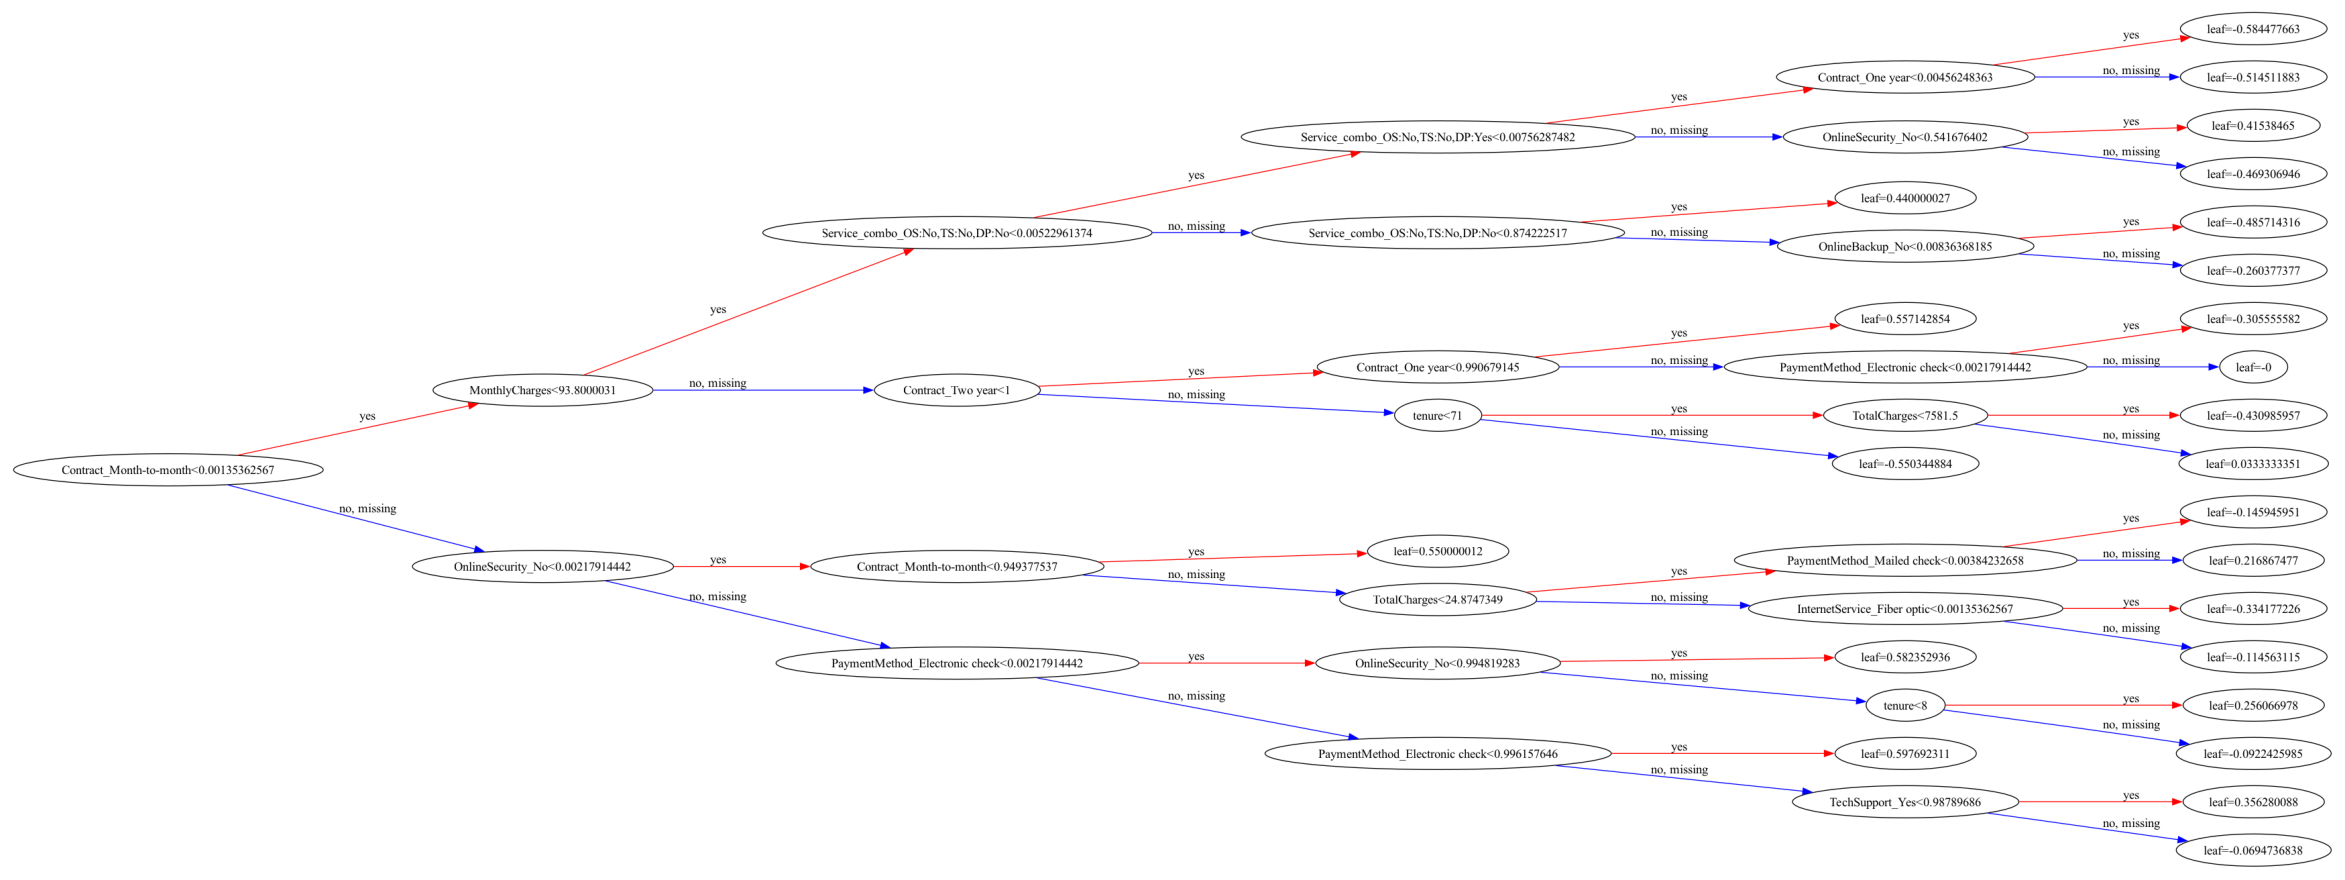

In [330]:
import matplotlib.pyplot as plt
from xgboost import plot_tree
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 30,20
plot_tree(model_xg, rankdir='LR')

                           feature  importance
35         Contract_Month-to-month    0.259672
17               OnlineSecurity_No    0.096986
26                  TechSupport_No    0.081342
8                   Dependents_Yes    0.054241
28                 TechSupport_Yes    0.052969
42  PaymentMethod_Electronic check    0.051445
39            PaperlessBilling_Yes    0.042075
20                 OnlineBackup_No    0.034072
38             PaperlessBilling_No    0.028684
13               MultipleLines_Yes    0.028335


<Axes: title={'center': 'Feature Importance'}, xlabel='importance', ylabel='feature'>

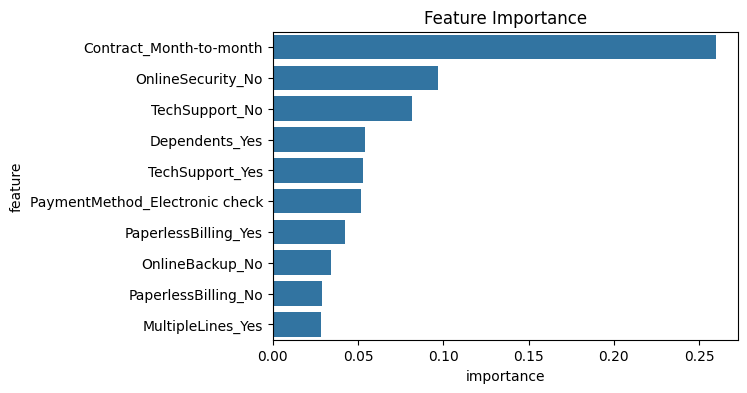

In [331]:
# Feature Importance
importance_xg = pd.DataFrame({
    'feature':train_inputs.columns,
    'importance':model_xg.feature_importances_
}).sort_values('importance',ascending=False)
 
print(importance_xg.head(10))
plt.figure(figsize=(6,4))
plt.title('Feature Importance')
sns.barplot(data=importance_xg.head(10),x='importance',y='feature')
# Month-to-month cause most churn 

In [333]:
# K Fold Cross Validation
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

def train_and_evaluation(X_train_res,y_train_res,test_inputs,test_target,**params):
    model_xg= XGBClassifier(random_state=42,eval_metric='logloss',**params).fit(X_train_res,y_train_res)
    train_acc = accuracy_score(y_train_res,model_xg.predict(X_train_res))
    val_acc= accuracy_score(test_target,model_xg.predict(test_inputs))
    return model_xg,train_acc,val_acc
    

In [335]:
X = X_train_res
targets = y_train_res

def test_params_kfold(n_splits,**params):
    train_acc_list,test_acc_list,models=[],[],[]
    kfold = KFold(n_splits)
    
    for train_idxs, val_idxs in kfold.split(X):
        X_train_res,y_train_res = X.iloc[train_idxs],targets.iloc[train_idxs]
        test_inputs,test_target = X.iloc[val_idxs],targets.iloc[val_idxs]
        
        model,train_acc,val_acc = train_and_evaluation(X_train_res,y_train_res,test_inputs,test_target,**params)
        
        models.append(model)
        train_acc_list.append(train_acc)
        test_acc_list.append(val_acc)
        
    print('Train Accuracy:{:.2f}%,Validation Accuracy:{:.2f}%'.format(
        100*np.mean(train_acc_list),100*np.mean(test_acc_list)))
    return models


In [336]:
test_params_kfold(5,n_estimators=25,max_depth=5,learning_rate=0.2)

Train Accuracy:87.62%,Validation Accuracy:85.53%


[XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric='logloss',
               feature_types=None, feature_weights=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.2, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=5, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=25, n_jobs=None,
               num_parallel_tree=None, ...),
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
          

In [337]:
xg_pred = model_xg.predict(test_inputs)
print(confusion_matrix(test_target,xg_pred))
print(classification_report(test_inputs,xg_pred))

[[902 134]
 [140 233]]


ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets

1. 84% Correct about 0 Non-churn ,65% correct about 1 churned customers
2. The model caught 90% of 0 Non-churn, only caught 53% of 1 churned
# Insights : 
1. Non-churn has more sample , need more sample of Churned
2. Need to improve Class 1 Performance --- 
>Oversampling(SMOTE) or class weights to adress imbalance
>Threshold Adjustment: Lower the decision threshold to catch more Class 1 cases (if false negatives are costly).
>Feature Engineering:Add features that better distinguish Class 1.

In [338]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

# Step 1: Get predicted probabilities for the positive class (churn = 1)
xg_probs = model_xg.predict_proba(test_inputs)[:,1] # probability for class 1(churn)

# Step 2: Apply custom threshold
thresholds = [0.4,0.5,0.6,0.7,0.8]
print(f"{'Threshold':<10} {'Accuracy':<10} {'Precision':<10} {'Recall':<10} {'F1 Score':<10}")

# Step 3: Evaluate the performance
for threshold in thresholds:
    y_pred = (xg_probs >= threshold).astype(int)
    
    acc = accuracy_score(test_target, y_pred)
    prec = precision_score(test_target, y_pred)
    recall = recall_score(test_target, y_pred)
    f1 = f1_score(test_target, y_pred)
    
    print(f"{threshold:<10.2f} {acc:<10.2f} {prec:<10.2f} {recall:<10.2f} {f1:<10.2f}")


# Threshold = 0.4 is the best for catching churners

Threshold  Accuracy   Precision  Recall     F1 Score  
0.40       0.79       0.58       0.71       0.64      
0.50       0.81       0.63       0.62       0.63      
0.60       0.79       0.65       0.47       0.54      
0.70       0.79       0.73       0.33       0.46      
0.80       0.78       0.84       0.18       0.30      


In [340]:
# Final threshold for churn of XGBoost Model 
threshold = 0.4
xg_probs = model_xg.predict_proba(test_inputs)[:,1]
y_pred = (xg_probs>=threshold).astype(int)

print(confusion_matrix(test_target,y_pred))
print(classification_report(test_target,y_pred))

[[841 195]
 [107 266]]
              precision    recall  f1-score   support

           0       0.89      0.81      0.85      1036
           1       0.58      0.71      0.64       373

    accuracy                           0.79      1409
   macro avg       0.73      0.76      0.74      1409
weighted avg       0.81      0.79      0.79      1409



In [341]:
# Tuning XGBoost model using GridSearchCV 

from sklearn.model_selection import GridSearchCV
params = {
    'max_depth':[3,5],
    'scale_pos_weight':[1,5,10]
}
grid = GridSearchCV(model_xg,params,scoring='f1')
grid.fit(train_inputs,train_target)

threshold = 0.5
probs = grid.predict_proba(test_inputs)[:,1]
grid_pred = (probs>=threshold).astype(int)
print(confusion_matrix(test_target,grid_pred))
print(classification_report(test_target,grid_pred))

[[660 376]
 [ 43 330]]
              precision    recall  f1-score   support

           0       0.94      0.64      0.76      1036
           1       0.47      0.88      0.61       373

    accuracy                           0.70      1409
   macro avg       0.70      0.76      0.69      1409
weighted avg       0.81      0.70      0.72      1409



With GridSerchCV tuning ,return the best results(recall =0.84, and f1=0.61) for class 1(Churn),but precision is not good, which means some predicted churn customers not churn but stayed, it's better to catch and prevent customer churn in early times 

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

# 1. Scale features (critical for NNs)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_inputs)
X_test_scaled = scaler.transform(test_inputs)

# 2. Oversample minority class (Class 1)
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_train_scaled, train_target) # Train on balanced data


# 3. Train MLP with class weights
mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),  # 2 hidden layers
    activation='relu',
    solver='adam',
    alpha=0.001,  # L2 regularization
    batch_size=16,
    learning_rate_init=0.001,
    max_iter=100,
    early_stopping=True,
)
mlp.fit(X_resampled,y_resampled)


# 4. Predict with threshold
y_probs = mlp.predict_proba(X_val_scaled)[:, 1]

y_pred = (y_probs > 0.4).astype(int)  # Adjust threshold

print(confusion_matrix(val_target,y_pred))
print(classification_report(val_target,y_pred))


### mlp model with a threshold of class 1 = 0.4 is performing best in recall and fi-score in class 1 (churn)


[[588 234]
 [ 79 226]]
              precision    recall  f1-score   support

           0       0.88      0.72      0.79       822
           1       0.49      0.74      0.59       305

    accuracy                           0.72      1127
   macro avg       0.69      0.73      0.69      1127
weighted avg       0.78      0.72      0.74      1127

